_______________

# Background : Youth Opportunity Modelling

________________

The youth measure of opportunity may be modelled using the employment , for out case it would be a very simple
model which considers any type of employment both formal and informal. Different aspect determine youth opportunity
which is the Education , employment , social (background) and mass movement in and out of a region.

In our quest to determine youth opportunity, we will first investigate regression methods on the relationship
between various varaible against with employment. This report will detail the following:
    
1. Determine opportunity statuses from our data.

    __
    1.1 Education status
    __
    
    __
    1.2 Employment status
    __
    
    __
    1.3 Social status
    __

    __
    1.4 Immigration and migration status
    __
    
2.  Choose input and output variables that may have a relationship and investigate it. 
    
3. Determine opportunity varaiables using:
    
    3.1 Linear regression - determine linear relationship of our variable against employment
    3.2 Multiple regression using:
        3.2.1 Generalised linear models
        
    2.3 Gaussian Processes - to determine the non - linear relationship of variables
    
4. Decision tree -  given the variables with a observed relationship which can be modelled and based on the which 
variables describe youth per municipality what is their opportunity.
    

 _____________________________


_______________________________

In [193]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import warnings
warnings.warn("deprecated", DeprecationWarning)
warnings.simplefilter("ignore")
%matplotlib inline

# Education status
_________________

In [198]:
# # Education level by gender
df_educationlevel = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_AGE_20_TO_24_EDUCATION_LEVEL_South_Africa.csv')
# Education Attentrnce level by age group
df_attenlevel = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_EDUCATION_ATTENDANCE_AGE_INCOMPLETED_YEARS_GENDER_South_Africa.csv',\
                           )

In [17]:
df_educationlevel

,geo_level,geo_code,geoid,name,total,Any tertiary,Any tertiary-Female,Any tertiary-Male,Grade 10/11,Grade 10/11-Female,Grade 10/11-Male,Grade 9,Grade 9-Female,Grade 9-Male,Less than Grade9,Less than Grade9-Female,Less than Grade9-Male,Matric/matric equivalent,Matric/matric equivalent-Female,Matric/matric equivalent-Male
0,country,ZA,country-ZA,South Africa,4993756,314423,180307,134116,1525186,760474,764712,333652,148943,184709,666474,286031,380443,2154021,1157266,996755
1,municipality,WC044,municipality-WC044,George,16220,652,376,276,4602,2417,2185,1377,634,743,3016,1344,1672,6573,3526,3047
2,municipality,WC047,municipality-WC047,Bitou,4122,126,66,60,1336,732,604,430,180,250,676,263,413,1554,866,688
3,municipality,WC048,municipality-WC048,Knysna,5491,182,120,62,1655,915,740,584,278,306,1037,417,620,2033,1074,959
4,municipality,WC051,municipality-WC051,Laingsburg,564,25,13,12,139,77,62,84,34,50,160,66,94,156,84,72
5,municipality,WC052,municipality-WC052,Prince Albert,1087,23,15,8,227,126,101,142,69,73,389,194,195,306,146,160
6,municipality,WC053,municipality-WC053,Beaufort West,3824,101,54,47,1023,567,456,355,166,189,798,349,449,1547,829,718
7,municipality,MP303,municipality-MP303,Mkhondo,14268,277,143,134,4260,2209,2051,969,486,483,2455,1211,1244,6307,3368,2939
8,municipality,MP311,municipality-MP311,Victor Khanye,7063,262,122,140,2251,1061,1190,498,220,278,1216,510,706,2836,1412,1424
9,municipality,MP322,municipality-MP322,Mbombela,63033,3112,1904,1208,17853,8778,9075,3525,1551,1974,8046,3532,4514,30497,16811,13686


# Employement status
____________________

In [18]:
# Adults employed at home
df_adultempl_home = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_HOUSEHOLD_EMPLOYMENT_South_Africa.csv',\
                               )
# Youth current activities by gender
df_empl = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_EMPLOYMENT_EDUCATION_TRAINING_GENDER_South_Africa.csv',\
                     )

# Youth employment status by gender
df_empl_labour = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_LABOUR_FORCE_OFFICIAL_AGE_GROUP_GENDER_South_Africa.csv',\
                            )

# Social status

________________

In [19]:
# Poverty by youth age group
df_poverty = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_INCOME_POVERTY_AGE_GROUP_South_Africa.csv',\
                               )
# youth  with/without guardians
df_livingparent = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_LIVING_WITH_PARENTS_GENDER_South_Africa.csv',\
                               )

# youth  in multi-poverty by age gruop
df_povery_multi = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_INCOME_POVERTY_AGE_GROUP_South_Africa.csv',\
                               )

# youth  in multi-dimensional poverty by race
df_provery_multirace = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_MULTIDIMENSIONALLY_POOR_GENDER_POPULATION_GROUP_South_Africa.csv',\
                               )

# Immigration and Migration status
______________

In [20]:
# Youth birth place within the South Africa
df_birth_prov = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_PROVINCE_OF_BIRTH_South_Africa.csv',\
                           )
# Citizenship
df_birth = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_REGION_OF_BIRTH_South_Africa.csv',\
                      )

In [21]:
# Remove the population pf the whole country:ZA
df_empl = df_empl[df_empl.geo_code != 'ZA']
df_birth_prov = df_birth_prov[df_birth_prov.geo_code != 'ZA']
df_birth = df_birth[df_birth.geo_code != 'ZA']
df_empl_labour = df_empl_labour[df_empl_labour.geo_code != 'ZA']
df_adultempl_home = df_adultempl_home[df_adultempl_home.geo_code != 'ZA']
df_birth_prov = df_birth_prov[df_birth_prov.geo_code != 'ZA']
df_educationlevel = df_educationlevel[df_educationlevel.geo_code != 'ZA']
df_attenlevel = df_attenlevel[df_attenlevel.geo_code != 'ZA']
df_poverty = df_poverty[df_poverty.geo_code != 'ZA']
df_livingparent = df_livingparent[df_livingparent.geo_code != 'ZA']
df_provery_multirace = df_provery_multirace[df_provery_multirace.geo_code != 'ZA']

In [22]:
df_empl

,geo_level,geo_code,geoid,name,total,Employed,Employed-Female,Employed-Male,NEET,NEET-Female,NEET-Male,School/post-school,School/post-school-employment education training,School/post-school-Female,School/post-school-Male
1,municipality,WC044,municipality-WC044,George,31532,8567,3873,4694,11097,6150,4947,11868,0,6041,5827
2,municipality,WC047,municipality-WC047,Bitou,7399,1826,754,1072,3044,1690,1354,2529,0,1297,1232
3,municipality,WC048,municipality-WC048,Knysna,10280,2648,1141,1507,3745,2123,1622,3887,0,1982,1905
4,municipality,WC051,municipality-WC051,Laingsburg,1158,441,171,270,385,244,141,332,0,158,174
5,municipality,WC052,municipality-WC052,Prince Albert,2197,553,169,384,1001,597,404,643,0,313,330
6,municipality,WC053,municipality-WC053,Beaufort West,7655,1540,633,907,2943,1624,1319,3172,0,1557,1615
7,municipality,MP303,municipality-MP303,Mkhondo,29477,3883,1550,2333,9927,5832,4095,15667,0,7615,8052
8,municipality,MP311,municipality-MP311,Victor Khanye,13185,2894,955,1939,4701,2716,1985,5590,0,2668,2922
9,municipality,MP322,municipality-MP322,Mbombela,122131,19780,8489,11291,39049,22748,16301,63302,0,31503,31799
10,municipality,NW373,municipality-NW373,Rustenburg,91871,22558,7444,15114,35270,20003,15267,34043,0,16630,17413


In [23]:
df_empl_labour

,geo_level,geo_code,geoid,name,total,employed,employed-15-19,employed-15-19-Female,employed-15-19-Male,employed-20-24,employed-20-24-Female,employed-20-24-Male,unemployed,unemployed-15-19,unemployed-15-19-Female,unemployed-15-19-Male,unemployed-20-24,unemployed-20-24-Female,unemployed-20-24-Male
1,municipality,WC044,municipality-WC044,George,14269,8567,1691,742,949,6876,3131,3745,5702,2175,1111,1064,3527,1909,1618
2,municipality,WC047,municipality-WC047,Bitou,4034,1827,269,124,145,1558,630,928,2207,743,399,344,1464,845,619
3,municipality,WC048,municipality-WC048,Knysna,4946,2649,456,187,269,2193,955,1238,2297,803,457,346,1494,783,711
4,municipality,WC051,municipality-WC051,Laingsburg,605,441,109,41,68,332,130,202,164,77,50,27,87,47,40
5,municipality,WC052,municipality-WC052,Prince Albert,841,552,123,27,96,429,141,288,289,111,51,60,178,100,78
6,municipality,WC053,municipality-WC053,Beaufort West,2838,1538,360,153,207,1178,479,699,1300,485,249,236,815,440,375
7,municipality,MP303,municipality-MP303,Mkhondo,9217,3882,685,292,393,3197,1257,1940,5335,1685,932,753,3650,2058,1592
8,municipality,MP311,municipality-MP311,Victor Khanye,5570,2894,411,156,255,2483,799,1684,2676,821,410,411,1855,962,893
9,municipality,MP322,municipality-MP322,Mbombela,42750,19780,3036,1345,1691,16744,7144,9600,22970,6046,3315,2731,16924,9433,7491
10,municipality,NW373,municipality-NW373,Rustenburg,45721,22558,3206,1199,2007,19352,6245,13107,23163,6306,3117,3189,16857,8812,8045


___
# Normalize the data
___

In [27]:
# Normalize the data

#df_empl = normalize_data(df_empl)
#df_provery_multirace = normalize_data(df_provery_multirace)
#df_livingparent = normalize_data(df_livingparent)
#df_birth_prov = normalize_data(df_birth_prov)
#df_birth = normalize_data(df_birth)
#df_attenlevel = normalize_data(df_attenlevel)

Employemnt_data    = normalize_data(df_empl_labour)   

EmployedAdults_data = normalize_data(df_adultempl_home)

Educationlevel_data = normalize_data(df_educationlevel)

Poverty_data        = normalize_data(df_poverty)
EmployedYouth        = normalize_data(df_empl)

In [182]:
print ("Education:", Educationlevel_data.columns)
print(" ")
print ("Adult employed:", EmployedAdults_data.columns)
print(" ")
print ("Education level:", Educationlevel_data.columns)
print(" ")
print ("Poverty:" ,Poverty_data.columns)
print(" ")
print ("Employed youth:", EmployedYouth.columns)

('Education:', Index([u'geo_level', u'geo_code', u'geoid', u'name', u'Any tertiary',
       u'Any tertiary-Female', u'Any tertiary-Male', u'Grade 10/11',
       u'Grade 10/11-Female', u'Grade 10/11-Male', u'Grade 9',
       u'Grade 9-Female', u'Grade 9-Male', u'Less than Grade9',
       u'Less than Grade9-Female', u'Less than Grade9-Male',
       u'Matric/matric equivalent', u'Matric/matric equivalent-Female',
       u'Matric/matric equivalent-Male'],
      dtype='object'))
 
('Adult employed:', Index([u'geo_level', u'geo_code', u'geoid', u'name',
       u'At least one employed adult', u'No employed adult'],
      dtype='object'))
 
('Education level:', Index([u'geo_level', u'geo_code', u'geoid', u'name', u'Any tertiary',
       u'Any tertiary-Female', u'Any tertiary-Male', u'Grade 10/11',
       u'Grade 10/11-Female', u'Grade 10/11-Male', u'Grade 9',
       u'Grade 9-Female', u'Grade 9-Male', u'Less than Grade9',
       u'Less than Grade9-Female', u'Less than Grade9-Male',
       u'Ma

In [175]:
print Employemnt_data.shape
print EmployedAdults_data.shape
print Educationlevel_data.shape
print Poverty_data.shape


(278, 18)
(278, 6)
(278, 19)
(278, 20)


___________________

# Job opporturnity measure 
______________________

In [54]:
# Predicting variables

Inputfeatures = pd.DataFrame()


Inputfeatures[['Atleast_one_employed_adult',\
            'No_employed_adult']]= EmployedAdults_data[['At least one employed adult','No employed adult']]

    
Inputfeatures[['Youth_finished_school','Youth_finished_school_and_working']]= EmployedYouth[[
                                    'School/post-school','School/post-school-employment education training']]

Inputfeatures[['Youth_provery_15_24','Youth_provery_25_34']] = Poverty_data[['Income-poor-15-24',\
                                                                             'Income-poor-25-34']]
Inputfeatures[['Youth_tertiary']] = Educationlevel_data[['Any tertiary']]


# Predicted variable
Outputfeature = pd.DataFrame()
Outputfeature['Employment'] = EmployedYouth['Employed']

_________
### Regression Methods
_______

#### Simple Linear Regression (LR)

In [55]:

import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn import model_selection

In [163]:
def normalize_data(x):
    """
    normalizes the input data x 
    """

    x1 = x.iloc[:, :4]
    x2 = x.iloc[:,5:].div(x.total, axis=0)
    x3 = pd.concat([x1,x2],axis=1)
    return x3

def load_data(dataX,dataY,seed=3):
    """
    loads training and testing data
    """
    
    #Splitting out validation dataset
    
    X = dataX.values.reshape(-1, 1)
    Y = dataY.values
    test_size = 0.10
    seed = seed
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size=test_size, random_state=seed)
    
    # Train and Test dataset size details
    print "Train_x Shape :: ", X_train.shape
    print "Train_y Shape :: ", Y_train.shape
    print "Test_x Shape :: ", X_test.shape
    print "Test_y Shape :: ", Y_test.shape
    
    return X_train, X_test, Y_train, Y_test


def Linear_regression(x_train,x_test,y_train, y_test):
    
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    

    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X_test, Y_test))
    
    Prediction = regr.predict(X_test)
    print('predicted: %.3f  original: %.3f' % (np.mean(Prediction),np.mean(X_test)))
    
    # The mean squared error
    mse = np.mean((Prediction - y_test) ** 2)
    
    
    msg = 'MSE: {:.6f}'.format(mse)
    #print(msg)
    
    return mse
    
def Regreplot(x,y, y_pre, xtitle,ytitle):
    title = xtitle + ' ' + 'vs' + ' ' + ytitle
    fig, ax = plt.subplots(figsize=(15,8))
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

    plt.rc('font', **font)
    ax.scatter(x, y, color='black',alpha=0.5)
    ax.plot(x, y_pre, color='blue', linewidth=3)
    ax.legend(['Predcited','Data'])
    ax.set_xlabel(xtitle)
    ax.set_ylabel(ytitle)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    fig.suptitle(title,fontsize=15)
    plt.pause(0.1)
    plt.show()

In [164]:
# # normalize the data with total samples
# datax, datay = Inputfeatures, Outputfeature
# # load and split the data in training and testing
# X_train, X_test, Y_train, Y_test = load_data(dataX,dataY, seed=15)
# # after training test on testing data
# mse1 = []
# for i in range(1,X_train.shape[0],10):
#     mse = Linear_regression(X_train[:i], Y_train[:i], X_test[:i], Y_test[:i])
#     mse1.append(mse)
# # plotting 

#Regreplot( X_test, Y_test, y_pre, 'Number adult employed at home (%)','Employed Youth (%)')

____
Analysis: It can be nd that youth stay with adult who are able to generate income at home, result in higher chance
of employment. This may be due that most the youth  parent are able to pay for their childens education.
____

In [165]:

# # normalize the data with total samples
# datax, datay = Inputfeatures,Outputfeature
# # data
# dataX, dataY =  datax.loc[:100,'Atleast_one_employed_adult'], Outputfeature.loc[:100,'Employment'] 
# # load and split the data in training and testing
# X_train, X_test, Y_train, Y_test = load_data(dataX,dataY, seed=2)
# # after training test on testing data
# for i in range(1,X_train.shape[0],10):
#     print(X_train.shape[0])
#     mse = Linear_regression(X_train[:i], Y_train[:i], X_test, Y_test)
#     mse1.append(mse)
# y_pre = Linear_regression(X_train,X_test,Y_train, Y_test)
# plotting 
#Regreplot( X_test, Y_test, y_pre, 'Number adult not employed at home (%)','Employed Youth (%)')

____
Analysis: It can be seen that municipalities  with youth that live with gaurdians which are not employed are the 
ones that faces unemployemnt. This may be due to some not affording education or simply being discouarge and thus
looking for jobs.
____

______

# Generalised Linear Models

_____

In [166]:
Inputfeatures.head(12)

,Atleast_one_employed_adult,No_employed_adult,Youth_finished_school,Youth_finished_school_and_working,Youth_provery_15_24,Youth_provery_25_34,Youth_tertiary
1,0.796401,0.203599,0.376380,0.0,0.089266,0.068739,0.040197
2,0.770731,0.229269,0.341803,0.0,0.087659,0.085466,0.030568
3,0.787067,0.212933,0.378113,0.0,0.087142,0.074968,0.033145
4,0.828498,0.171502,0.286701,0.0,0.077143,0.066939,0.044326
5,0.700947,0.299053,0.292672,0.0,0.118472,0.091498,0.021159
6,0.596496,0.403504,0.414370,0.0,0.107787,0.079952,0.026412
7,0.511380,0.488620,0.531499,0.0,0.165292,0.091284,0.019414
8,0.706581,0.293419,0.423967,0.0,0.111937,0.079583,0.037095
9,0.667182,0.332818,0.518312,0.0,0.132178,0.086004,0.049371
10,0.745674,0.254326,0.370552,0.0,0.071590,0.057448,0.044274


In [167]:
Outputfeature.head(2)

,Employment
1,0.271692
2,0.246790


In [168]:
# Load modules and data
import statsmodels.api as sm

# DEFINE PREDICTORS
X = sm.add_constant(Inputfeatures)
Y = Outputfeature.Employment

# Instantiate a gamma family model with the default link function.
gamma_model = sm.GLM(Y, X, family=sm.families.family.Gamma())

gamma_results = gamma_model.fit()


print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Employment   No. Observations:                  278
Model:                            GLM   Df Residuals:                      272
Model Family:                   Gamma   Df Model:                            5
Link Function:          inverse_power   Scale:                 0.0463275346954
Method:                          IRLS   Log-Likelihood:                 578.69
Date:                Tue, 16 Jan 2018   Deviance:                       13.274
Time:                        10:02:04   Pearson chi2:                     12.6
No. Iterations:                     6                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 3.3896      0.645      5.257      0.000       2

_____

# Gaussian Processes Model 

Modelling the unlinear relationship
_____

In [169]:
# import numpy as np
# from matplotlib import pyplot as plt
# from sklearn.gaussian_process import GaussianProcess
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, ExpSineSquared


# def Gaussian_processes(X, y):
#     """
#     Gaussian 
#     """

#     #Splitting the dataset
#     X = np.array(X)
    
#     X = np.atleast_2d(X).T
#     y = (np.array(y)).T
#     #Reshaping X
#     X = X.reshape(-1,1)
    
#     # Mesh the input space for evaluations of the real function, the prediction and
#     # its MSE
#     l = X.shape[0]
#     x = np.atleast_2d(np.linspace(X.min(),X.max(),10000)).T

    
#     # Instanciation of a Gaussian Process model with the relevant parameters 
#     kernel = C(1, (.01, .09)) * RBF(0.02, (0.01, .009)) 
#     #kernel  =  RBF(0.4, (.01, 1))

#     gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

#     # Fitting to data using Maximum Likelihood Estimation of the parameters
#     gp.fit(X, y)
    

#     # Predictions on the meshed x values and asking for MSE 
#     y_pred, sigma = gp.predict(x, return_std=True)
    
# #     # The mean squared error
# #     mse = np.mean((y_pred - y) ** 2)
# #     msg = 'MSE: {:.6f}'.format(mse)
# #     print(msg)
    
#     return y_pred, sigma, x
# # data 
# # normalize the data with total samples
# datax, datay = Inputfeatures,Outputfeature
# # data
# dataX, dataY =  datax.loc[:,'Atleast_one_employed_adult'], Outputfeature.loc[:,'Employment'] 
# print dataX.shape
# print dataY.shape
# y_pred, sigma, x  = Gaussian_processes(dataX, dataY)

# # Function plot showing prediciton and the 95 % confidence interval derived from the MSE
# fig = plt.figure(figsize=(15,10))
# plt.plot(dataX, dataY, 'r.', markersize=10, label=u'Observations')
# plt.plot(x, y_pred, 'b-', label=u'Prediction')
# plt.fill(np.concatenate([x, x[::-1]]),
#          np.concatenate([y_pred - 1.9600 * sigma,
#                         (y_pred + 1.9600 * sigma)[::-1]]),
#          alpha=.5, fc='g', ec='None', label='95% confidence interval')
# plt.xlabel('At least one employed adult')
# plt.ylabel('Number of adult employed at home vs Number of youth Completed Matric')
# plt.title('Number of adult employed at home and Number of youth Completed Matric')
# plt.legend(loc='upper left')
# plt.show()    

In [170]:
# from scipy import interpolate
# olddata = dataX
# x1 = np.linspace(0,1,olddata.shape[0] )
# print olddata.shape[0] 
# #Extrapolation function 
# f1 = interpolate.interp1d(x1, olddata, fill_value = "extrapolate")  

# #generating new x input values in the range of 1 to 10
# newData=[]
# for i in range(1,10):
#     newData.append(f1(i-10))
# newData=np.array(newData)


# newData=[newData]

# newData=np.transpose(newData)

# print ("Extrapolated values",newData)




# y1=f1(newData).ravel()

# print("New Generated outputs =", y1)
# print("Graph for Extrapolated data")



# dataX, dataY =  datax.loc[:10,'At least one employed adult'], datay.loc[:10,'Matric '] 
# print dataX.shape
# print dataY.shape
# y_pred, sigma, x  = Gaussian_processes(newData, y1)



# fig1 = plt.figure(figsize=(10,8))

# plt.plot(newData, y1, 'r.', markersize=10, label=u'Observations')
# plt.plot(x, y_pred, 'b-', label=u'Prediction')
# plt.fill(np.concatenate([x, x[::-1]]),
#          np.concatenate([y_pred - 1.9600 * sigma,
#                         (y_pred + 1.9600 * sigma)[::-1]]),
#          alpha=.5, fc='b', ec='None', label='95% confidence interval')
# plt.xlabel('At least one employed adult')
# plt.ylabel('Number of adult employed at home vs Number of youth Completed Matric')
# plt.title('Number of adult employed at home and Number of youth Completed Matric')
# plt.show()


____

# Decision Tree And Random Forest
_____

In [186]:
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import collections

def Decision_tree(X_train, Y_train, X_test, Y_test):
    
#     crossvalidation = KFold(n=X_train.shape[0], n_folds=5,shuffle=True, random_state=1)
    
    tree_classifier = tree.DecisionTreeRegressor(criterion = "mse",
    max_depth=4, random_state=0, min_samples_split=20)
    
    
    # Create random forest classifier instance
    
    trained_model = tree_classifier.fit(X_train, Y_train)
    predictions = trained_model.predict(X_test)
    
    
    print('predicted: %.3f  original: %.3f' % (np.mean(predictions),np.mean(X_test)))
#     print ('original:' ,X_test)
    
#     print ('prediction:' ,predictions)
    
   # Train and Test Accuracy
#     scores = cross_val_score(tree_classifier, X_train, Y_train, cv=crossvalidation, n_jobs=-1)
#     mean_score = np.mean(scores)
#     print('Scores: %s' % scores)
#     print('Training Mean Accuracy: %.3f' % (mean_score))

    
    mse = np.mean( ((predictions - Y_test))**2)
    # The mean squared error
#     print("Mean squared error: %.2f"% mse)


    return mse

 

Train_x Shape ::  (250, 1)
Train_y Shape ::  (250,)
Test_x Shape ::  (28, 1)
Test_y Shape ::  (28,)
predicted: 0.217  original: 0.630
predicted: 0.146  original: 0.481
predicted: 0.138  original: 0.497
predicted: 0.144  original: 0.512
predicted: 0.125  original: 0.501
predicted: 0.122  original: 0.501
predicted: 0.124  original: 0.492
predicted: 0.127  original: 0.492
predicted: 0.139  original: 0.492
predicted: 0.130  original: 0.492
predicted: 0.129  original: 0.492
predicted: 0.131  original: 0.492
predicted: 0.139  original: 0.492
predicted: 0.137  original: 0.492
predicted: 0.134  original: 0.492
predicted: 0.139  original: 0.492
predicted: 0.136  original: 0.492
predicted: 0.138  original: 0.492
predicted: 0.137  original: 0.492
predicted: 0.135  original: 0.492
predicted: 0.136  original: 0.492
predicted: 0.137  original: 0.492
predicted: 0.137  original: 0.492
predicted: 0.141  original: 0.492
predicted: 0.140  original: 0.492
predicted: 0.140  original: 0.492
predicted: 0.140

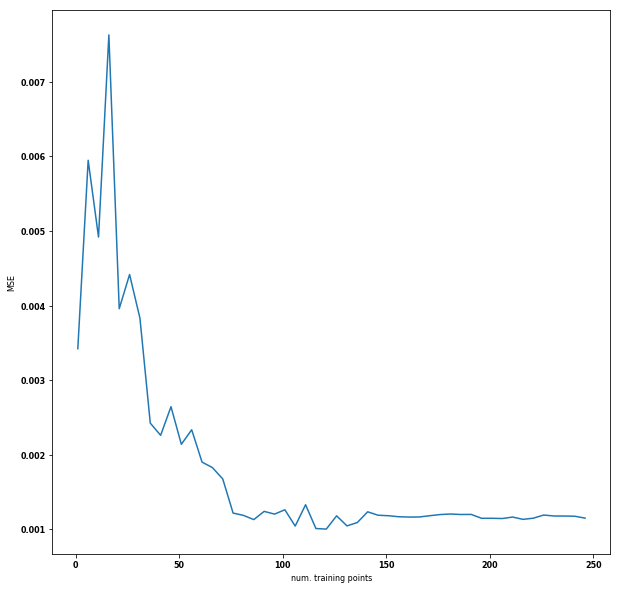

In [192]:
datax, datay = Inputfeatures,Outputfeature
data_feature_names= Inputfeatures.columns
X_train, X_test, Y_train, Y_test = load_data(dataX,dataY, seed=2)

mse1 = []
p = []
for i in range(1,X_train.shape[0],5):
    p.append(i)
    mse = Decision_tree(X_train[:i], Y_train[:i], X_test[:i], Y_test[:i])
    mse1.append(mse)
plt.figure(figsize=(10,10))
plt.plot(p,mse1,label='training')
plt.xlabel("num. training points")
plt.ylabel("MSE")
plt.show()

In [ ]:
# from scipy.stats import sem

# def Decision_tree(X_train, Y_train, X_test, Y_test):
    
#     crossvalidation = KFold(n=X_train.shape[0], n_folds=10,shuffle=True, random_state=1)
#     scores=np.zeros(X_train[:].shape[0])
#     tree_classifier = tree.DecisionTreeRegressor(criterion = "mse",splitter= 'random',
#     max_depth=8, random_state=0, min_samples_split=30)
#     scores=np.zeros(X_train[:].shape[0])
#     for train_index,test_index in crossvalidation:
#         X_train_cv, X_test_cv= X_train[train_index], X_train[test_index]
#         y_train_cv, y_test_cv= Y_train[train_index], Y_train[test_index]
#         trained_model = tree_classifier.fit(X_train_cv,y_train_cv)
#         y_pred=trained_model.predict(X_test_cv)
        
#         scores[test_index]= trained_model.score(np.atleast_2d(y_test_cv).T, np.atleast_2d(y_pred).T) 
#         print (("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))
#     return y_pred, X_test_cv, y_test_cv
    

In [ ]:
# datax, datay = Inputfeatures,Outputfeature
# data_feature_names= Inputfeatures.columns
# X_train, X_test, Y_train, Y_test = load_data(dataX,dataY, seed=2)
# y_pred, X_test_cv, y_test_cv = Decision_tree(X_train,Y_train,X_test, Y_test)
# Regreplot( X_test_cv,y_test_cv, y_pre, '7','8')


In [ ]:
def visualize_tree(tree, feature_names):
    
    dot_data = tree.export_graphviz(tree_classifier,
                                    feature_names=data_feature_names,
                                    out_file=None,
                                    filled=True,
                                    rounded=True,
                                   special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('turquoise','orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))
    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    graph.write_png('tree.png')
    Image(graph.create_png())
    

In [ ]:
Inputfeatures.shape

In [14]:
datax, datay = Inputfeatures,Outputfeature
data_feature_names= Inputfeatures.columns
X_train, X_test, Y_train, Y_test = load_data(dataX,dataY, seed=2)
predictions, trained_model = Decision_tree(X_train,Y_train,X_test, Y_test)

#visualize_tree(trained_model, data_feature_names)


NameError: name 'Inputfeatures' is not defined

In [ ]:
X,y = Inputfeatures.values , Outputfeature.values

In [ ]:
from sklearn import tree
for depth in range(1,4):
    tree_classifier = tree.DecisionTreeRegressor(criterion = "mse",splitter= 'random',
    max_depth=depth, random_state=0)
    if tree_classifier.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_classifier, X, y, cv=crossvalidation, n_jobs=1))
    print 'Depth: %i Accuracy: %.3f' % (depth,score)
print ("Number of input features: %i and outputs: %i  " %(tree_classifier.n_features_,tree_classifier.n_outputs_))
    
print tree_classifier.fit(X,y).tree_.max_depth

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
crossvalidation = KFold(n=10, n_folds=10,shuffle=True, random_state=1)
crossvalidation


In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import collections

In [ ]:

dot_data = tree.export_graphviz(tree_classifier,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
 
colors = ('turquoise','orange')
edges = collections.defaultdict(list)
 
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')
Image(graph.create_png())